In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data directory and parameter info file
data_dir = "/disk/xray15/aem2/data/28pams/IllTNG/LFs/"
param_info_file = "/disk/xray15/aem2/data/28pams/Info_IllustrisTNG_L25n256_28params.txt"

SNAPSHOTS = {
    '044': 2.00,
    '052': 1.48,
    '060': 1.05,
    '086': 0.10
}

def calculate_parameter_values(param_info):
    """Calculate all parameter values based on LogFlag."""
    min_val = param_info['MinVal']
    max_val = param_info['MaxVal']
    fid_val = param_info['FiducialVal']
    
    if param_info['LogFlag']:
        # Logarithmic spacing
        log_min = np.log10(min_val)
        log_max = np.log10(max_val)
        log_fid = np.log10(fid_val)
        
        # Calculate n1 and 1 values in log space
        n1_val = 10**(log_min + (log_fid - log_min)/2)
        val_1 = 10**(log_fid + (log_max - log_fid)/2)
    else:
        # Linear spacing
        n1_val = min_val + (fid_val - min_val)/2
        val_1 = fid_val + (max_val - fid_val)/2
    
    return {
        'n2': min_val,    # MinVal
        'n1': n1_val,     # Calculated intermediate value
        '0': fid_val,     # FiducialVal
        '1': val_1,       # Calculated intermediate value
        '2': max_val      # MaxVal
    }


# Calculate parameter values based on LogFlag
def calculate_intermediate_values(min_val, max_val, fid_val, log_flag):
    if log_flag:
        # Logarithmic spacing
        log_min = np.log10(min_val)
        log_max = np.log10(max_val)
        log_fid = np.log10(fid_val)
        
        # Calculate n1 and 1 values in log space
        n1_val = 10**(log_min + (log_fid - log_min)/2)
        val_1 = 10**(log_fid + (log_max - log_fid)/2)
    else:
        # Linear spacing
        n1_val = min_val + (fid_val - min_val)/2
        val_1 = fid_val + (max_val - fid_val)/2
    
    return n1_val, val_1

def read_uvlf(filename):
    """Read UVLF data from file."""
    data = np.loadtxt(filename, skiprows=1)
    phi = data[:, 0]          # First column is phi
    phi_sigma = data[:, 1]    # Second column is phi_sigma
    hist = data[:, 2]         # Third column is hist
    return phi, phi_sigma, hist


Could not plot variation 0: /disk/xray15/aem2/data/28pams/IllTNG/LFs//LF_IllustrisTNG_1P_p16_0_044.txt not found.


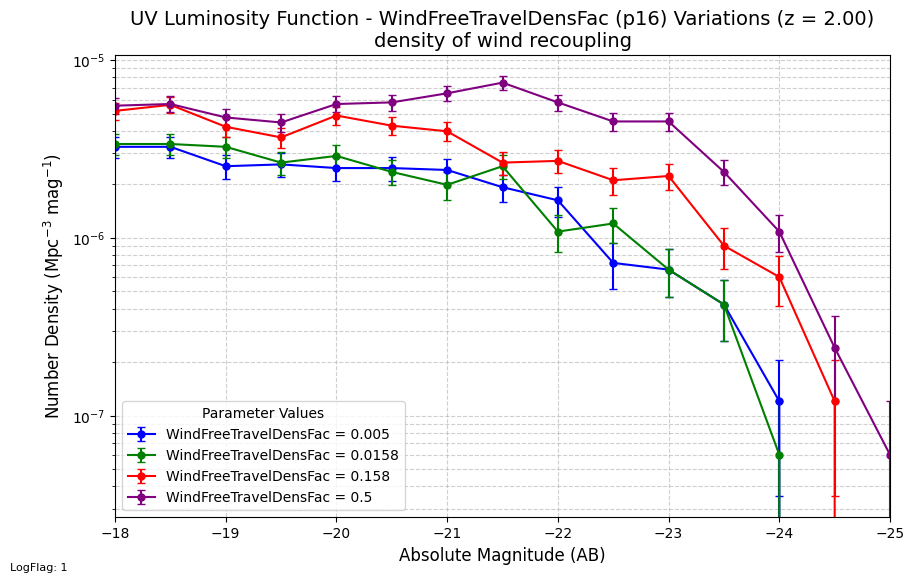

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data directory and parameter info file
data_dir = "/disk/xray15/aem2/data/28pams/IllTNG/LFs/"
param_info_file = "/disk/xray15/aem2/data/28pams/Info_IllustrisTNG_L25n256_28params.txt"

def read_uvlf(filename):
    """Read UVLF data from file."""
    data = np.loadtxt(filename, skiprows=1)
    phi = data[:, 0]          # First column is phi
    phi_sigma = data[:, 1]    # Second column is phi_sigma
    hist = data[:, 2]         # Third column is hist
    return phi, phi_sigma, hist

# Parameter number to plot
param_num = 16  # Change this value to plot different parameters

# Read parameter information
params_df = pd.read_csv(param_info_file)
param_info = params_df.iloc[param_num - 1]  # Get the correct row based on param_num

# Get parameter values
min_val = param_info['MinVal']
max_val = param_info['MaxVal']
fid_val = param_info['FiducialVal']
n1_val, val_1 = calculate_intermediate_values(min_val, max_val, fid_val, param_info['LogFlag'])

# Map the variations to their values
param_values = {
    'n2': min_val,    # MinVal
    'n1': n1_val,     # Calculated intermediate value
    '0': fid_val,     # FiducialVal
    '1': val_1,       # Calculated intermediate value
    '2': max_val      # MaxVal
}

# Create the figure
plt.figure(figsize=(10, 6))

# Define the variations and their corresponding colors
variations = ['n2', 'n1', '0', '1', '2']  # Updated to include '0' instead of using '1' twice
colors = ['blue', 'green', 'black', 'red', 'purple']  # Added color for fiducial value

# Plot each variation
for var, color in zip(variations, colors):
    filename = f"{data_dir}/LF_IllustrisTNG_1P_p{param_num}_{var}_044.txt"
    
    try:
        # Read the data
        phi, phi_sigma, hist = read_uvlf(filename)
        
        # Create magnitude bins (assuming 15 bins from -25 to -18)
        mag_bins = np.linspace(-25, -18, 15)
        
        # Create label with parameter value
        if var == '0':
            label = f'{param_info["ParamName"]} = {param_values[var]:.3g} (Fiducial)'
        else:
            label = f'{param_info["ParamName"]} = {param_values[var]:.3g}'
        
        # Plot with error bars and parameter value in legend
        plt.errorbar(mag_bins, phi, yerr=phi_sigma, 
                    fmt='o-', color=color, 
                    label=label,
                    markersize=5, capsize=3)
    except Exception as e:
        print(f"Could not plot variation {var}: {e}")

# Customize the plot
plt.yscale('log')
plt.xlabel('Absolute Magnitude (AB)', fontsize=12)
plt.ylabel('Number Density (Mpc$^{-3}$ mag$^{-1}$)', fontsize=12)
plt.title(f'UV Luminosity Function - {param_info["ParamName"]} (p{param_num}) Variations (z = 2.00)\n{param_info["Description"]}', 
          fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend(loc='lower left', title='Parameter Values')

# Set axis limits
#plt.ylim(1e-7, 1e-3)
plt.xlim(-18, -25)  # Flipped x-axis limits

# Add parameter LogFlag information as text
param_details = f"LogFlag: {param_info['LogFlag']}"
plt.figtext(0.02, 0.02, param_details, fontsize=8)

# Save the plot
output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/"
plt.savefig(f'{output_dir}/UVLF_param_{param_num}_z2.00.pdf', 
            bbox_inches='tight', dpi=300)
plt.show()

Plot one to test:

Plot them ALLL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

# Define the data directory and parameter info file
data_dir = "/disk/xray15/aem2/data/28pams/IllTNG/LFs/"
param_info_file = "/disk/xray15/aem2/data/28pams/Info_IllustrisTNG_L25n256_28params.txt"

# Define available snapshots and their corresponding redshifts


def create_uvlf_plot(param_num, snap, param_info, output_dir):
    """Create UVLF plot for a specific parameter and snapshot."""
    # Check if any files exist for this parameter and snapshot
    pattern = os.path.join(data_dir, f"LF_IllustrisTNG_1P_p{param_num}_*_{snap}.txt")
    if not glob.glob(pattern):
        print(f"No files found for parameter {param_num} at snapshot {snap}")
        return
    
    # Get parameter values
    min_val = param_info['MinVal']
    max_val = param_info['MaxVal']
    fid_val = param_info['FiducialVal']
    n1_val, val_1 = calculate_intermediate_values(min_val, max_val, fid_val, param_info['LogFlag'])

    # Map the variations to their values
    param_values = {
        'n2': min_val,    # MinVal
        'n1': n1_val,     # Calculated intermediate value
        '0': fid_val,     # FiducialVal
        '1': val_1,       # Calculated intermediate value
        '2': max_val      # MaxVal
    }

    # Create the figure
    plt.figure(figsize=(10, 6))

    # Define the variations and their corresponding colors
    variations = ['n2', 'n1', '0', '1', '2']
    colors = ['blue', 'green', 'black', 'red', 'purple']

    # Plot each variation
    for var, color in zip(variations, colors):
        filename = os.path.join(data_dir, f"LF_IllustrisTNG_1P_p{param_num}_{var}_{snap}.txt")
        
        if os.path.exists(filename):
            # Read the data
            phi, phi_sigma, hist = read_uvlf(filename)
            
            if phi is not None:
                # Create magnitude bins (assuming 15 bins from -25 to -18)
                mag_bins = np.linspace(-25, -18, 15)
                
                # Create label with parameter value
                if var == '0':
                    label = f'{param_info["ParamName"]} = {param_values[var]:.3g} (Fiducial)'
                else:
                    label = f'{param_info["ParamName"]} = {param_values[var]:.3g}'
                
                # Plot with error bars and parameter value in legend
                plt.errorbar(mag_bins, phi, yerr=phi_sigma, 
                            fmt='o-', color=color, 
                            label=label,
                            markersize=5, capsize=3)
        else:
            print(f"File not found: {filename}")

    # Only save plot if data was actually plotted
    if plt.gca().has_data():
        # Customize the plot
        plt.yscale('log')
        plt.xlabel('Absolute Magnitude (AB)', fontsize=12)
        plt.ylabel('Number Density (Mpc$^{-3}$ mag$^{-1}$)', fontsize=12)
        plt.title(f'UV Luminosity Function - {param_info["ParamName"]} (p{param_num}) Variations (z = {SNAPSHOTS[snap]})\n{param_info["Description"]}', 
                  fontsize=14)
        plt.grid(True, which='both', linestyle='--', alpha=0.6)
        plt.legend(loc='upper left', title='Parameter Values')

        # Set axis limits
        #plt.ylim(1e-5, 1e-3)
        #plt.xlim(-18, -26)  # Flipped x-axis

        # Add parameter LogFlag information as text
        param_details = f"LogFlag: {param_info['LogFlag']}"
        plt.figtext(0.02, 0.02, param_details, fontsize=8)

        # Create redshift-specific subdirectory
        redshift_dir = os.path.join(output_dir, f'z{SNAPSHOTS[snap]}')
        os.makedirs(redshift_dir, exist_ok=True)

        # Save the plot
        plt.savefig(os.path.join(redshift_dir, f'UVLF_param_{param_num}_{param_info["ParamName"]}_z{SNAPSHOTS[snap]}.pdf'), 
                    bbox_inches='tight', dpi=300)
    
    plt.close()

def main():
    # Read parameter information
    params_df = pd.read_csv(param_info_file)
    
    # Define output directory
    output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P"
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Iterate over all parameters and snapshots
    for param_num in range(1, 29):  # Parameters 1-28
        for snap in SNAPSHOTS.keys():
            print(f"Processing parameter {param_num} at z={SNAPSHOTS[snap]}")
            create_uvlf_plot(param_num, snap, params_df.iloc[param_num-1], output_dir)
            
    print("Processing complete!")

if __name__ == "__main__":
    main()

Processing parameter 1 at z=2.0
Processing parameter 1 at z=1.48
Processing parameter 1 at z=1.05
Processing parameter 1 at z=0.1
Processing parameter 2 at z=2.0
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p2_0_044.txt
Processing parameter 2 at z=1.48
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p2_0_052.txt
Processing parameter 2 at z=1.05
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p2_0_060.txt
Processing parameter 2 at z=0.1
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p2_0_086.txt
Processing parameter 3 at z=2.0
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p3_0_044.txt
Processing parameter 3 at z=1.48
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p3_0_052.txt
Processing parameter 3 at z=1.05
File not found: /disk/xray15/aem2/data/28pams/IllTNG/LFs/LF_IllustrisTNG_1P_p3_0_060.txt
Processing paramete

Plot parameter variation:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def create_grid_plot(params_df, snap, nrows=7, ncols=4):
    """Create a grid plot of all parameter variations with improved layout."""
    
    # Create figure with extra space for title
    fig = plt.figure(figsize=(20, 32))  # Made figure slightly taller
    
    # Create GridSpec to manage subplot layout
    gs = fig.add_gridspec(nrows + 1, ncols, height_ratios=[0.2] + [1]*nrows)

    # Add title in the extra space we created
    fig.suptitle(f'UVLF Parameter Variations (z = {SNAPSHOTS[snap]})', 
                 fontsize=16, y=0.98)  # Moved title higher
    
    # Define consistent colors for variations
    variations = ['n2', 'n1', '1', '2']
    colors = ['blue', 'green', 'red', 'purple']
    
    # Create plots for each parameter
    axes = []
    for i in range(nrows):
        row_axes = []
        for j in range(ncols):
            if i*ncols + j < 28:  # Only create necessary plots
                ax = fig.add_subplot(gs[i+1, j])  # +1 because first row is for title
                row_axes.append(ax)
        if row_axes:
            axes.append(row_axes)
    
    # Convert to numpy array for easier indexing
    axes = np.array(axes)
    axes_flat = axes.flatten()
    
    # Create plots for each parameter
    for param_num in range(1, 29):
        ax = axes_flat[param_num-1]
        param_info = params_df.iloc[param_num-1]
        
        # Plot each variation
        for var, color in zip(variations, colors):
            filename = f"{data_dir}/LF_IllustrisTNG_1P_p{param_num}_{var}_{snap}.txt"
            
            if os.path.exists(filename):
                try:
                    phi, phi_sigma, _ = read_uvlf(filename)
                    mag_bins = np.linspace(-25, -18, len(phi))
                    
                    ax.errorbar(mag_bins, phi, yerr=phi_sigma, 
                              fmt='o-', color=color, 
                              label=var,
                              markersize=2, capsize=1,
                              linewidth=1, elinewidth=0.5)
                except Exception as e:
                    print(f"Error plotting {filename}: {e}")
        
        # Customize each subplot
        ax.set_yscale('log')
        #ax.set_ylim(1e-7, 1e-3)
        #ax.set_xlim(-18, -25)
        ax.grid(True, which='both', linestyle='--', alpha=0.3)
        
        # Add parameter info
        ax.set_title(f'p{param_num}: {param_info["ParamName"]}', fontsize=8)
        
        # Only add axis labels for outer plots
        if param_num > 24:  # Bottom row
            ax.set_xlabel('Magnitude (AB)', fontsize=8)
        if param_num % ncols == 0:  # Leftmost column
            ax.set_ylabel('Φ (Mpc$^{-3}$ mag$^{-1}$)', fontsize=8)
        
        # Adjust tick label sizes
        ax.tick_params(axis='both', which='major', labelsize=6)
        
        # Add LogFlag info
        ax.text(0.02, 0.02, f'LogFlag: {param_info["LogFlag"]}', 
                transform=ax.transAxes, fontsize=6)
    
    # Create legend
    legend_elements = [plt.Line2D([0], [0], color=c, label=v) 
                      for c, v in zip(colors, variations)]
    
    # Add legend in the empty space of the first row
    legend_ax = fig.add_subplot(gs[0, :])
    legend_ax.axis('off')
    legend_ax.legend(handles=legend_elements, 
                    loc='center',  # we can adjust this
                    bbox_to_anchor=(0.5, 0.5),  # we can adjust the y-value here
                    ncol=4,
                    title='Variations',
                    fontsize=10,
                    title_fontsize=12)
        
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Adjust spacing for title and legend
    plt.subplots_adjust(top=0.96, hspace=0.4)

    # Save plot
    output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P"
    plt.savefig(os.path.join(output_dir, f'UVLF_all_parameters_z{SNAPSHOTS[snap]}.pdf'), 
                bbox_inches='tight', dpi=300)
    plt.close()

def main():
    # Read parameter information
    params_df = pd.read_csv(param_info_file)
    
    # Create grid plots for each redshift
    for snap in SNAPSHOTS.keys():
        print(f"Creating grid plot for z={SNAPSHOTS[snap]}")
        create_grid_plot(params_df, snap)
        print(f"Completed z={SNAPSHOTS[snap]}")

if __name__ == "__main__":
    main()

Creating grid plot for z=2.0
Completed z=2.0
Creating grid plot for z=1.48
Completed z=1.48
Creating grid plot for z=1.05
Completed z=1.05
Creating grid plot for z=0.1
Completed z=0.1


Plot redshift variation:

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def calculate_parameter_values(param_info):
    """Calculate all parameter values based on LogFlag."""
    min_val = param_info['MinVal']
    max_val = param_info['MaxVal']
    fid_val = param_info['FiducialVal']
    
    if param_info['LogFlag']:
        # Logarithmic spacing
        log_min = np.log10(min_val)
        log_max = np.log10(max_val)
        log_fid = np.log10(fid_val)
        
        # Calculate n1 and 1 values in log space
        n1_val = 10**(log_min + (log_fid - log_min)/2)
        val_1 = 10**(log_fid + (log_max - log_fid)/2)
    else:
        # Linear spacing
        n1_val = min_val + (fid_val - min_val)/2
        val_1 = fid_val + (max_val - fid_val)/2
    
    return {
        'n2': min_val,    # MinVal
        'n1': n1_val,     # Calculated intermediate value
        '0': fid_val,     # FiducialVal
        '1': val_1,       # Calculated intermediate value
        '2': max_val      # MaxVal
    }

def create_redshift_evolution_plot(param_num, params_df):
    """Create plot showing redshift evolution for each variation of a parameter."""
    
    param_info = params_df.iloc[param_num-1]
    
    # Calculate parameter values
    param_values = calculate_parameter_values(param_info)
    
    # Create a figure with subplots for each variation
    variations = ['n2', 'n1', '1', '2']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Redshift Evolution - {param_info["ParamName"]} (p{param_num})\n{param_info["Description"]}', 
                 fontsize=14)
    
    # Colors for different redshifts
    redshift_colors = {
        '044': 'darkred',    # z=2.00
        '052': 'orangered',  # z=1.48
        '060': 'orange',     # z=1.05
        '086': 'gold'        # z=0.10
    }
    
    # Plot each variation in its own subplot
    for ax, variation in zip(axes.flatten(), variations):
        # Plot each redshift
        for snap, color in redshift_colors.items():
            filename = f"{data_dir}/LF_IllustrisTNG_1P_p{param_num}_{variation}_{snap}.txt"
            
            if os.path.exists(filename):
                try:
                    # Read data
                    phi, phi_sigma, _ = read_uvlf(filename)
                    mag_bins = np.linspace(-25, -18, len(phi))
                    
                    # Plot with error bars
                    ax.errorbar(mag_bins, phi, yerr=phi_sigma,
                              fmt='o-', color=color,
                              label=f'z = {SNAPSHOTS[snap]}',
                              markersize=4, capsize=2)
                except Exception as e:
                    print(f"Error plotting {filename}: {e}")
        
        # Customize subplot
        ax.set_yscale('log')
        #ax.set_ylim(1e-7, 1e-3)
        #ax.set_xlim(-18, -25)
        ax.grid(True, which='both', linestyle='--', alpha=0.3)
        
        # Add variation info to subplot title using parameter value
        if variation == '0':
            ax.set_title(f'{param_info["ParamName"]} = {param_values[variation]:.3g} (Fiducial)', fontsize=10)
        else:
            ax.set_title(f'{param_info["ParamName"]} = {param_values[variation]:.3g}', fontsize=10)
        
        # Add axis labels
        ax.set_xlabel('Magnitude (AB)', fontsize=10)
        ax.set_ylabel('Φ (Mpc$^{-3}$ mag$^{-1}$)', fontsize=10)
        
        # Add legend
        ax.legend(fontsize=8)
    
    # Add parameter details
    plt.figtext(0.02, 0.02, f'LogFlag: {param_info["LogFlag"]}', fontsize=8)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save plot
    output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/redshift_evolution"
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, f'UVLF_redshift_evolution_p{param_num}_{param_info["ParamName"]}.pdf'), 
                bbox_inches='tight', dpi=300)
    plt.close()

def main():
    # Read parameter information
    params_df = pd.read_csv(param_info_file)
    
    # Create redshift evolution plots for each parameter
    for param_num in range(1, 29):
        print(f"Creating redshift evolution plot for parameter {param_num}")
        create_redshift_evolution_plot(param_num, params_df)
        print(f"Completed parameter {param_num}")

if __name__ == "__main__":
    main()

Creating redshift evolution plot for parameter 1
Completed parameter 1
Creating redshift evolution plot for parameter 2
Completed parameter 2
Creating redshift evolution plot for parameter 3
Completed parameter 3
Creating redshift evolution plot for parameter 4
Completed parameter 4
Creating redshift evolution plot for parameter 5
Completed parameter 5
Creating redshift evolution plot for parameter 6
Completed parameter 6
Creating redshift evolution plot for parameter 7
Completed parameter 7
Creating redshift evolution plot for parameter 8
Completed parameter 8
Creating redshift evolution plot for parameter 9
Completed parameter 9
Creating redshift evolution plot for parameter 10
Completed parameter 10
Creating redshift evolution plot for parameter 11
Completed parameter 11
Creating redshift evolution plot for parameter 12
Completed parameter 12
Creating redshift evolution plot for parameter 13
Completed parameter 13
Creating redshift evolution plot for parameter 14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Completed parameter 14
Creating redshift evolution plot for parameter 15
Completed parameter 15
Creating redshift evolution plot for parameter 16
Completed parameter 16
Creating redshift evolution plot for parameter 17
Completed parameter 17
Creating redshift evolution plot for parameter 18
Completed parameter 18
Creating redshift evolution plot for parameter 19
Completed parameter 19
Creating redshift evolution plot for parameter 20
Completed parameter 20
Creating redshift evolution plot for parameter 21
Completed parameter 21
Creating redshift evolution plot for parameter 22
Completed parameter 22
Creating redshift evolution plot for parameter 23
Completed parameter 23
Creating redshift evolution plot for parameter 24
Completed parameter 24
Creating redshift evolution plot for parameter 25
Completed parameter 25
Creating redshift evolution plot for parameter 26
Completed parameter 26
Creating redshift evolution plot for parameter 27
Completed parameter 27
Creating redshift evolution 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def calculate_parameter_values(param_info):
    """Calculate all parameter values based on LogFlag."""
    min_val = param_info['MinVal']
    max_val = param_info['MaxVal']
    fid_val = param_info['FiducialVal']
    
    if param_info['LogFlag']:
        # Logarithmic spacing
        log_min = np.log10(min_val)
        log_max = np.log10(max_val)
        log_fid = np.log10(fid_val)
        
        # Calculate n1 and 1 values in log space
        n1_val = 10**(log_min + (log_fid - log_min)/2)
        val_1 = 10**(log_fid + (log_max - log_fid)/2)
    else:
        # Linear spacing
        n1_val = min_val + (fid_val - min_val)/2
        val_1 = fid_val + (max_val - fid_val)/2
    
    return {
        'n2': min_val,    # MinVal
        'n1': n1_val,     # Calculated intermediate value
        '0': fid_val,     # FiducialVal
        '1': val_1,       # Calculated intermediate value
        '2': max_val      # MaxVal
    }

def create_parameter_variation_plot(param_num, params_df):
    """Create plot showing parameter variations for each redshift."""
    
    param_info = params_df.iloc[param_num-1]
    param_values = calculate_parameter_values(param_info)
    
    # Create a figure with subplots for each redshift
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Parameter Variations - {param_info["ParamName"]} (p{param_num})\n{param_info["Description"]}', 
                 fontsize=14)
    
    # Colors for different parameter variations
    variations = ['n2', 'n1', '0', '1', '2']
    variation_colors = {
        'n2': 'blue',
        'n1': 'green',
        '0': 'black',
        '1': 'red',
        '2': 'purple'
    }
    
    # Plot each redshift in its own subplot
    for ax, (snap, redshift) in zip(axes.flatten(), SNAPSHOTS.items()):
        # Plot each parameter variation
        for var, color in variation_colors.items():
            filename = f"{data_dir}/LF_IllustrisTNG_1P_p{param_num}_{var}_{snap}.txt"
            
            if os.path.exists(filename):
                try:
                    # Read data
                    phi, phi_sigma, _ = read_uvlf(filename)
                    mag_bins = np.linspace(-25, -18, len(phi))
                    
                    # Create label with parameter value
                    if var == '0':
                        label = f'{param_info["ParamName"]} = {param_values[var]:.3g} (Fiducial)'
                    else:
                        label = f'{param_info["ParamName"]} = {param_values[var]:.3g}'
                    
                    # Plot with error bars
                    ax.errorbar(mag_bins, phi, yerr=phi_sigma,
                              fmt='o-', color=color,
                              label=label,
                              markersize=4, capsize=2)
                except Exception as e:
                    print(f"Error plotting {filename}: {e}")
        
        # Customize subplot
        ax.set_yscale('log')
        #ax.set_ylim(1e-7, 1e-3)
        #ax.set_xlim(-18, -25)
        ax.grid(True, which='both', linestyle='--', alpha=0.3)
        
        # Add redshift info to subplot title
        ax.set_title(f'z = {redshift}', fontsize=12)
        
        # Add axis labels
        ax.set_xlabel('Magnitude (AB)', fontsize=10)
        ax.set_ylabel('Φ (Mpc$^{-3}$ mag$^{-1}$)', fontsize=10)
        
        # Add legend
        ax.legend(fontsize=8, loc='lower right')
    
    # Add parameter details
    plt.figtext(0.02, 0.02, f'LogFlag: {param_info["LogFlag"]}', fontsize=8)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save plot
    output_dir = "/disk/xray15/aem2/plots/28pams/IllustrisTNG/1P/parameter_variation"
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, f'UVLF_parameter_variation_p{param_num}_{param_info["ParamName"]}.pdf'), 
                bbox_inches='tight', dpi=300)
    plt.close()

def main():
    # Read parameter information
    params_df = pd.read_csv(param_info_file)
    
    # Create parameter variation plots for each parameter
    for param_num in range(1, 29):
        print(f"Creating parameter variation plot for parameter {param_num}")
        create_parameter_variation_plot(param_num, params_df)
        print(f"Completed parameter {param_num}")

if __name__ == "__main__":
    main()

Creating parameter variation plot for parameter 1
Completed parameter 1
Creating parameter variation plot for parameter 2
Completed parameter 2
Creating parameter variation plot for parameter 3
Completed parameter 3
Creating parameter variation plot for parameter 4
Completed parameter 4
Creating parameter variation plot for parameter 5
Completed parameter 5
Creating parameter variation plot for parameter 6
Completed parameter 6
Creating parameter variation plot for parameter 7
Completed parameter 7
Creating parameter variation plot for parameter 8
Completed parameter 8
Creating parameter variation plot for parameter 9
Completed parameter 9
Creating parameter variation plot for parameter 10
Completed parameter 10
Creating parameter variation plot for parameter 11
Completed parameter 11
Creating parameter variation plot for parameter 12
Completed parameter 12
Creating parameter variation plot for parameter 13
Completed parameter 13
Creating parameter variation plot for parameter 14
Compl